# Programming

In [2]:
import numpy as np
import pandas as pd
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io.arff import loadarff
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
sns.set_style('darkgrid')
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

# Load the data
data = loadarff('data/pd_speech.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

def calculate_scores(kmeans):
    def purity_score(y_true, y_pred):
        confusion_matrix = contingency_matrix(y_true, y_pred)
        return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)
    
    silhouette_scores = np.array([])
    purity_scores = np.array([])
    for k in kmeans:
        silhouette_scores = np.append(silhouette_scores, silhouette_score(X_scaled, k.labels_))
        purity_scores = np.append(purity_scores, purity_score(labels, k.labels_))
    print(f'Silhouette scores: {silhouette_scores}')
    print(f'Purity scores: {purity_scores}')

In [3]:
X = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values

# Normalize the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

kmeans = [KMeans(n_clusters=3, random_state=seed).fit(X_scaled) for seed in range(3)]

In [4]:
calculate_scores(kmeans)

Silhouette scores: [0.11362028 0.11403554 0.11362028]
Purity scores: [0.76719577 0.76322751 0.76719577]


['tqwt_entropy_shannon_dec_16', 'tqwt_kurtosisValue_dec_34']


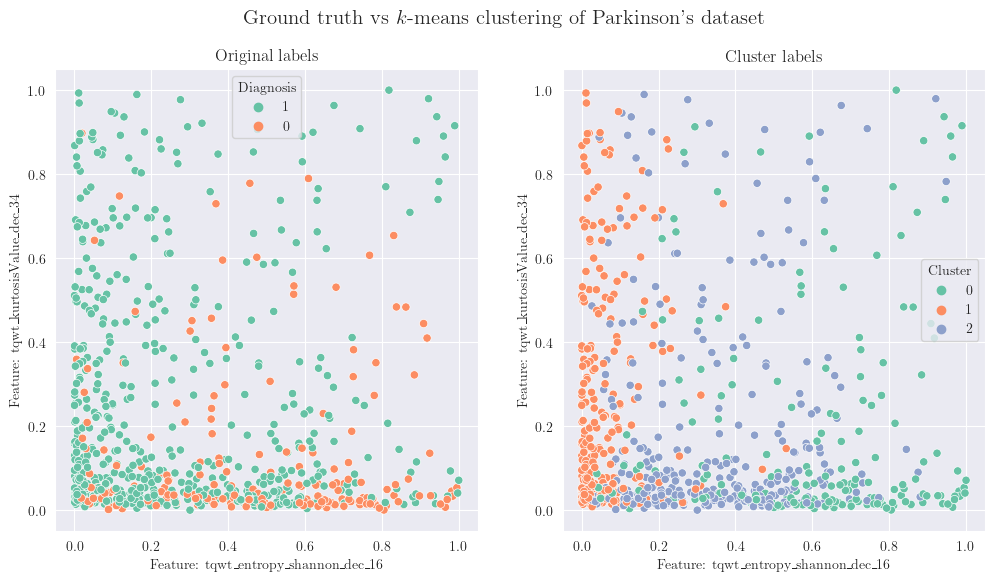

In [7]:
# Exercise 4 below

def select_most_informative_features(kmeans, n):
  variances = np.var(X_scaled, axis=0)
  variance_indexes = np.argsort(variances)[::-1][:n]
  return variance_indexes, [df.columns[i] for i in variance_indexes]

variance_indexes, most_informative_features = select_most_informative_features(kmeans, 2)

# Plot the data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
x = X_scaled[:, variance_indexes[0]]
y = X_scaled[:, variance_indexes[1]]

print(most_informative_features)

plt.suptitle('Ground truth vs $k$-means clustering of Parkinson\'s dataset', fontsize=15)

# TODO: change legend to show the actual class names/clusters

for i, ax in enumerate(axes):
  if i == 0:
    sns.scatterplot(x=x, y=y, hue=labels, ax=ax, palette='Set2')
    ax.set_title('Original labels')
    ax.get_legend().set_title("Diagnosis")
  else:
    sns.scatterplot(x=x, y=y, hue=kmeans[0].labels_, ax=ax, palette='Set2')
    ax.set_title("Cluster labels")
    ax.get_legend().set_title("Cluster")
  ax.set_xlabel(f'Feature: {most_informative_features[0]}')
  ax.set_ylabel(f'Feature: {most_informative_features[1]}')
plt.savefig('assets/parkinsons.png')
plt.show()

In [6]:
# Exercise 6 below

def calculate_pca(X, n_components):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit(X)
    return X_pca

pca = calculate_pca(X_scaled, 0.8)
print(f"Number of principal components: {pca.n_components_}")

Number of principal components: 31
